In [1]:
import os
from mdcrow import MDCrow

In [2]:
prompt13 = "Analyze the RDF of the simulation of 1A3N solvated in water."
llm_var = "claude-3-5-sonnet-20240620"
tools = "all"
agent = MDCrow(agent_type="Structured", model=llm_var, top_k_tools=tools, use_memory=False)
print(llm_var)

claude-3-5-sonnet-20240620


In [3]:
agent.run(prompt13)

Thought: To analyze the RDF (Radial Distribution Function) of the simulation of 1A3N solvated in water, we need to follow a series of steps. First, we need to download the PDB file for 1A3N, then set up and run a simulation with water solvation, and finally calculate and analyze the RDF. Let's start by downloading the PDB file.

Action:
```
{
    "action": "PDBFileDownloader",
    "action_input": "1A3N"
}
```PDB file found with this ID: 1A3N
Thought: Great, we have successfully downloaded the PDB file for 1A3N. Now, we need to set up and run a simulation of this protein solvated in water. We'll use the SetUpandRunFunction tool for this purpose, making sure to include water solvation in the system parameters.

Action:
```
{
    "action": "SetUpandRunFunction",
    "action_input": {
        "pdb_id": "1A3N_002402",
        "forcefield_files": ["amber14-all.xml", "amber14/tip3pfb.xml"],
        "save": true,
        "system_params": {
            "nonbondedMethod": "PME",
            "non

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

In [4]:
registry = agent.path_registry
print(os.path.basename(registry.ckpt_dir))
paths_and_descriptions = registry.list_path_names_and_descriptions()
print("\n".join(paths_and_descriptions.split(",")))

ckpt_72
Files found in registry: 1A3N_002402: PDB file downloaded from RSCB
 PDBFile ID: 1A3N_002402
 1A3N_002452: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_002457: Initial positions for simulation sim0_002457
 sim0_002457: Basic Simulation of Protein 1A3N_002452
 rec0_002521: Simulation trajectory for protein 1A3N_002452 and simulation sim0_002457
 rec1_002521: Simulation state log for protein 1A3N_002452 and simulation sim0_002457
 rec2_002521: Simulation pdb frames for protein 1A3N_002452 and simulation sim0_002457
 fig0_021738: RDF plot for the trajectory file with id: rec0_002521


In [5]:
import re
import os
from IPython.display import Image
matches = re.findall(r"fig0_\d+", paths_and_descriptions)

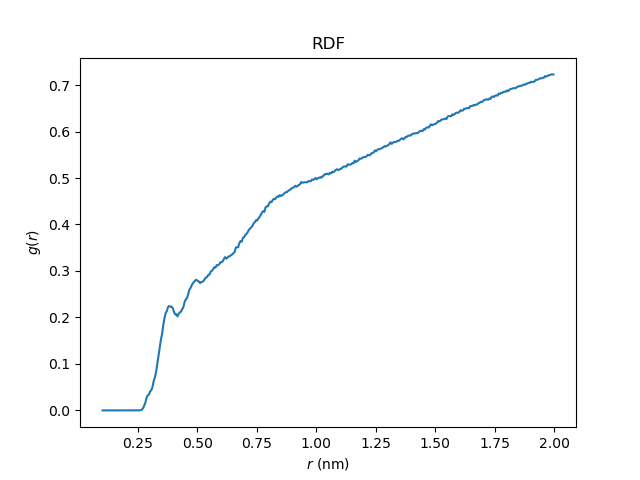

In [6]:
file_id1 = matches[0]
path1 = registry.get_mapped_path(file_id1)
assert os.path.exists(path1), "Path does not exist"
Image(filename=path1)